In [1]:
import numpy as np
from Fisher_Forecaster import *
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
from subprocess import Popen, PIPE

In [40]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True

In [41]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned)

In [4]:
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")

In [5]:
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m,w0,h0,A_s,om_b,n_s,wa
om_m,1.459519e+07,-1.475275e+06,5.417305e+06,8.058935e+14,-8.234665e+06,1.374134e+06,-4.762714e+05
w0,-1.475275e+06,1.507932e+05,-5.487490e+05,-8.191833e+13,8.376148e+05,-1.352799e+05,4.878512e+04
h0,5.417305e+06,-5.487490e+05,2.017211e+06,3.000333e+14,-3.082222e+06,5.110437e+05,-1.776567e+05
A_s,8.058935e+14,-8.191833e+13,3.000333e+14,4.473161e+22,-4.581158e+14,7.504762e+13,-2.653330e+13
om_b,-8.234665e+06,8.376148e+05,-3.082222e+06,-4.581158e+14,4.756592e+06,-7.779722e+05,2.723483e+05
n_s,1.374134e+06,-1.352799e+05,5.110437e+05,7.504762e+13,-7.779722e+05,1.415229e+05,-4.362618e+04
wa,-4.762714e+05,4.878512e+04,-1.776567e+05,-2.653330e+13,2.723483e+05,-4.362618e+04,1.582982e+04


In [6]:
para_pairs_list = [("om_m", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 173907860946.00238
w0 wa 26.789234262891803


In [53]:
for i in range(1, 9):
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "%d"%i, "0.1"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)

In [54]:
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 230496377929.70358
w0 wa 29.66043894102571


## Now let's tune some derivatives

In [5]:
delta_start = 1e-3
delta_end = 3e-1
delta_num = 30
deltas = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

#### Parameter $\Omega_m$

In [55]:
tune_para = 'om_m'

In [56]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [58]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [59]:
pwd

'/home/nbhandar/Fisher'

In [60]:
for i in range(len(deltas)):
#     if i == 1:
#         break
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "1", "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
#     output, err = p.communicate(b"input data that is passed to subprocess' stdin")
#     rc = p.returncode
    derivs[i] = np.loadtxt("deriv_om_m.dat")
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 481077151046.59186
w0 wa 37.36030853688536
run 2/50
om_m A_s 338679508977.2695
w0 wa 33.091465618181424
run 3/50
om_m A_s 307828851139.269
w0 wa 30.698040822069935
run 4/50
om_m A_s 263036904499.1652
w0 wa 22.460861783031966
run 5/50
om_m A_s 301417008303.12085
w0 wa 25.370927533066357
run 6/50
om_m A_s 365575511222.623
w0 wa 30.713362435051653
run 7/50
om_m A_s 358836770234.34784
w0 wa 32.089704057475984
run 8/50
om_m A_s 399564945579.7856
w0 wa 35.27810914520004
run 9/50
om_m A_s 354575290530.40295
w0 wa 31.101768504627795
run 10/50
om_m A_s 355966792521.9873
w0 wa 28.92049372395261
run 11/50
om_m A_s 359204120011.6525
w0 wa 27.873866027858824
run 12/50
om_m A_s 399415221170.4683
w0 wa 31.35585814637561
run 13/50
om_m A_s 429461151548.83844
w0 wa 33.925097807831165
run 14/50
om_m A_s 371945996910.112
w0 wa 29.515556255566437
run 15/50
om_m A_s 274052015557.55835
w0 wa 22.813548263769846
run 16/50
om_m A_s 399745688507.423
w0 wa 30.53340835850393
run 17/50
om_m A_s 3

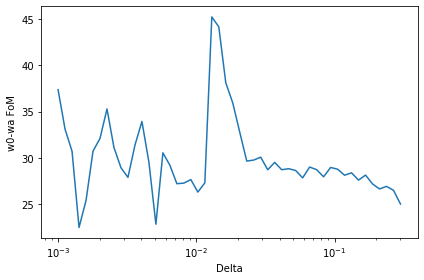

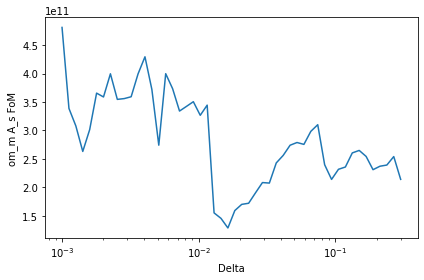

In [61]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $\Omega_m$

In [13]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "1", "0.1"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 417489787069.9648
w0 wa 24.464161669232027


#### Parameter $w_0$

In [5]:
tune_para = 'w_0'

In [6]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [7]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [10]:
for i in range(len(deltas)):
#     if i == 1:
#         break
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "2", "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
#     output, err = p.communicate(b"input data that is passed to subprocess' stdin")
#     rc = p.returncode
    derivs[i] = np.loadtxt("deriv_w0.dat")
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 299065741282.1257
w0 wa 79.43648600714074
run 2/50
om_m A_s 282065515785.1729
w0 wa 90.96299888166516
run 3/50
om_m A_s 224794529854.47104
w0 wa 38.957856895323374
run 4/50
om_m A_s 198844417964.54037
w0 wa 31.017667300804614
run 5/50
om_m A_s 205261704138.7678
w0 wa 29.90030184642024
run 6/50
om_m A_s 238741717206.0814
w0 wa 40.08181307888314
run 7/50
om_m A_s 248015780103.05893
w0 wa 38.04197239696547
run 8/50
om_m A_s 272800970443.97025
w0 wa 46.36709683284401
run 9/50
om_m A_s 229146457256.27087
w0 wa 37.89471860859567
run 10/50
om_m A_s 191182075845.69366
w0 wa 29.26271984386319
run 11/50
om_m A_s 176701922073.07236
w0 wa 27.744504978638282
run 12/50
om_m A_s 215845682013.7525
w0 wa 34.720117575817305
run 13/50
om_m A_s 171480318699.2135
w0 wa 25.172267949326532
run 14/50
om_m A_s 227154456645.3836
w0 wa 36.24088302207316
run 15/50
om_m A_s 182187525555.8047
w0 wa 27.140265788320256
run 16/50
om_m A_s 175182033138.2739
w0 wa 40.460409258532856
run 17/50
om_m A_s 

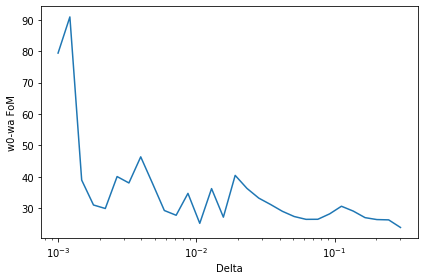

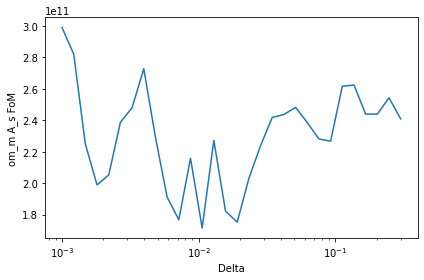

In [11]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.08 for $w_0$

In [14]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "2", "0.08"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 390423772919.10205
w0 wa 27.45565126807895


#### Parameter $h_0$

In [13]:
tune_para = 'h0'

In [14]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [15]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [16]:
for i in range(len(deltas)):
#     if i == 1:
#         break
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "3", "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
#     output, err = p.communicate(b"input data that is passed to subprocess' stdin")
#     rc = p.returncode
    derivs[i] = np.loadtxt("deriv_h0.dat")
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 234789454732.61664
w0 wa 23.868279544490868
run 2/50
om_m A_s 437219667616.7014
w0 wa 18.148450544232812
run 3/50
om_m A_s 553135845665.8323
w0 wa 20.052788179983892
run 4/50
om_m A_s 193520465096.3879
w0 wa 22.592087535832608
run 5/50
om_m A_s 244991114630.93
w0 wa 20.81488135137007
run 6/50
om_m A_s 270648698663.50864
w0 wa 18.93817732293754
run 7/50
om_m A_s 173029086794.46518
w0 wa 21.50893827097427
run 8/50
om_m A_s 149047212063.12677
w0 wa 23.26649880936346
run 9/50
om_m A_s 236162827507.10892
w0 wa 19.5410157664087
run 10/50
om_m A_s 162390513827.26553
w0 wa 22.110268954586818
run 11/50
om_m A_s 189140334846.43646
w0 wa 23.49238044189554
run 12/50
om_m A_s 183208616010.4899
w0 wa 22.534450070933577
run 13/50
om_m A_s 217805154850.19357
w0 wa 22.68849642459263
run 14/50
om_m A_s 217457524874.33542
w0 wa 21.467798894764556
run 15/50
om_m A_s 228182106956.96765
w0 wa 22.37122001697509
run 16/50
om_m A_s 219081623420.84976
w0 wa 22.54532124393417
run 17/50
om_m A_s

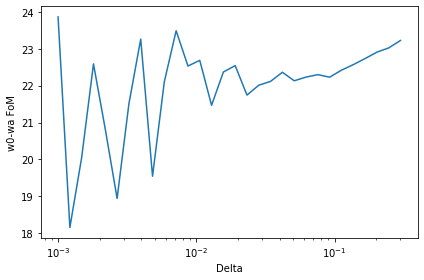

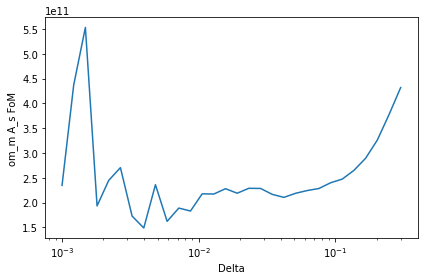

In [17]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.05 for $h_0$

In [15]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "3", "0.05"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 197816712319.86594
w0 wa 25.921554378264673


#### Parameter $A_s$

In [7]:
tune_para = 'A_s'

In [8]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [9]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [11]:
for i in range(len(deltas)):
#     if i == 1:
#         break
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "4", "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
#     output, err = p.communicate(b"input data that is passed to subprocess' stdin")
#     rc = p.returncode
    derivs[i] = np.loadtxt("deriv_A_s.dat")
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 695456918012.0348
w0 wa 18.597612581619547
run 2/50
om_m A_s 662713561457.3055
w0 wa 27.368678389429558
run 3/50
om_m A_s 717940568810.7509
w0 wa 36.32059507263628
run 4/50
om_m A_s 655406193265.6266
w0 wa 29.28765235461894
run 5/50
om_m A_s 689854949527.0277
w0 wa 27.194402073369407
run 6/50
om_m A_s 476664901140.1011
w0 wa 20.910670162586946
run 7/50
om_m A_s 365118900392.7648
w0 wa 18.93097411285211
run 8/50
om_m A_s 560128574094.122
w0 wa 25.33325388741852
run 9/50
om_m A_s 491319293708.0867
w0 wa 22.597220407368273
run 10/50
om_m A_s 522608280225.80676
w0 wa 23.80814510896898
run 11/50
om_m A_s 472770195322.5075
w0 wa 23.410371768297846
run 12/50
om_m A_s 482489764717.4072
w0 wa 23.020292937828383
run 13/50
om_m A_s 499885099737.10815
w0 wa 23.90245365105774
run 14/50
om_m A_s 450003018250.8395
w0 wa 22.432231824675487
run 15/50
om_m A_s 528023227394.38074
w0 wa 24.28252194209043
run 16/50
om_m A_s 492861641231.4065
w0 wa 23.673708464146912
run 17/50
om_m A_s 509

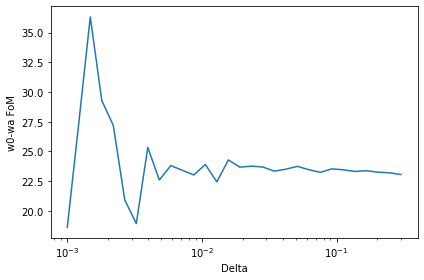

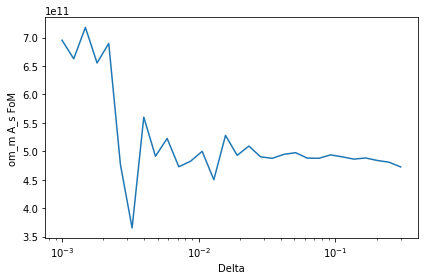

In [12]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $A_s$

In [16]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "4", "0.1"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 206370854660.35272
w0 wa 25.956302131170624


#### Parameter $\Omega_b$

In [17]:
tune_para = 'om_b'

In [18]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [19]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [20]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "5", "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
    derivs[i] = np.loadtxt("deriv_%s.dat"%tune_para)
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 155264884133.6006
w0 wa 13.8159402497474
run 2/50
om_m A_s 156389849646.16626
w0 wa 13.400107639164025
run 3/50
om_m A_s 165873178143.1827
w0 wa 12.821534293163054
run 4/50
om_m A_s 251635025768.36325
w0 wa 16.535087353115433
run 5/50
om_m A_s 193992514651.7108
w0 wa 14.77577786295647
run 6/50
om_m A_s 260750982771.1911
w0 wa 17.3156669523951
run 7/50
om_m A_s 238569745569.9113
w0 wa 18.562677138594598
run 8/50
om_m A_s 164902508528.19678
w0 wa 23.89645072649262
run 9/50
om_m A_s 134298882918.85973
w0 wa 22.57624232162792
run 10/50
om_m A_s 151982438662.17737
w0 wa 21.89330420685951
run 11/50
om_m A_s 264114686794.61948
w0 wa 24.46708237052194
run 12/50
om_m A_s 135889979611.55513
w0 wa 24.719447525986535
run 13/50
om_m A_s 134311151886.74515
w0 wa 26.140628157499414
run 14/50
om_m A_s 187316200900.6047
w0 wa 24.683343762407365
run 15/50
om_m A_s 162924217250.90137
w0 wa 25.19290736943082
run 16/50
om_m A_s 149508544280.01077
w0 wa 25.921060062871717
run 17/50
om_m A_

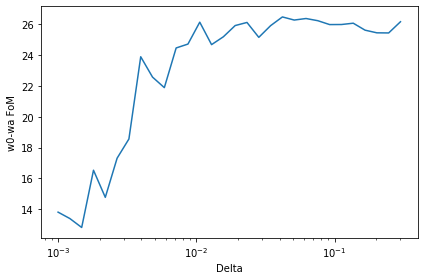

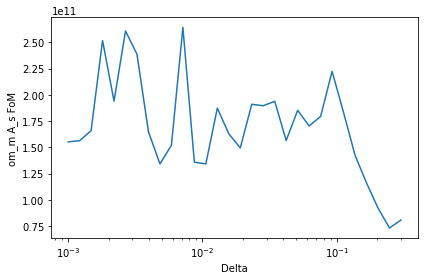

In [21]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.05 for $\Omega_b$

In [24]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "5", "0.05"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 167206405450.03745
w0 wa 26.476773506094375


#### Parameter $n_s$

In [25]:
tune_para = 'n_s'

In [26]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [27]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [28]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "6", "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
    derivs[i] = np.loadtxt("deriv_A_s.dat")
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 172975743237.8846
w0 wa 23.68821247358595
run 2/50
om_m A_s 163604478517.78354
w0 wa 25.087138427513175
run 3/50
om_m A_s 145767858849.39923
w0 wa 26.692677653861807
run 4/50
om_m A_s 169676037969.41278
w0 wa 26.84164636292466
run 5/50
om_m A_s 185511674958.1621
w0 wa 27.026037510752793
run 6/50
om_m A_s 161910638107.185
w0 wa 29.024605476406816
run 7/50
om_m A_s 155740219883.5139
w0 wa 27.68399377944201
run 8/50
om_m A_s 171796286299.48132
w0 wa 27.06777117963136
run 9/50
om_m A_s 163660921826.86237
w0 wa 26.367714614545825
run 10/50
om_m A_s 173000327408.23672
w0 wa 26.7441458917663
run 11/50
om_m A_s 171829111222.01392
w0 wa 27.046182195285493
run 12/50
om_m A_s 169165058525.06995
w0 wa 26.457091082851388
run 13/50
om_m A_s 168119361766.38257
w0 wa 26.985382934083145
run 14/50
om_m A_s 169436773061.48886
w0 wa 26.270971090446285
run 15/50
om_m A_s 167448951612.42764
w0 wa 27.037002861641923
run 16/50
om_m A_s 165106142943.74622
w0 wa 27.367616805376205
run 17/50
om

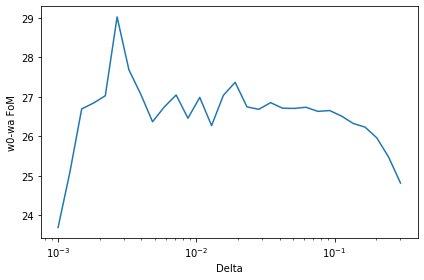

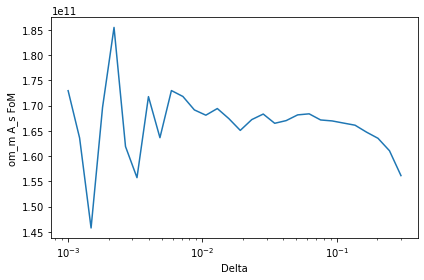

In [29]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.06 for $n_s$

In [30]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "6", "0.06"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 167875401319.6491
w0 wa 26.69176601806329


#### Parameter $w_a$

In [31]:
tune_para = 'wa'
para_ind = 8

In [32]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_A_s = np.zeros(deltas.shape)

In [33]:
derivs = np.zeros((len(deltas), *np.loadtxt("deriv_A_s.dat").shape))
cl_steps = []

In [6]:
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
list(zip(paras, range(len(paras))))

[('om_m', 0),
 ('w0', 1),
 ('h0', 2),
 ('A_s', 3),
 ('om_b', 4),
 ('n_s', 5),
 ('wa', 6)]

In [34]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "%d"%para_ind, "%f"%deltas[i]]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
    derivs[i] = np.loadtxt("deriv_A_s.dat")
    F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_A_s[i] = F.foms[('om_m', 'A_s')]
    

run 1/50
om_m A_s 287091041347.9433
w0 wa 226.88425878323503
run 2/50
om_m A_s 258755110512.44574
w0 wa 242.16898425132777
run 3/50
om_m A_s 262057922953.59918
w0 wa 215.2421172197894
run 4/50
om_m A_s 279407285882.74243
w0 wa 214.32252179005934
run 5/50
om_m A_s 290647618111.0373
w0 wa 160.25035261998315
run 6/50
om_m A_s 299554690229.356
w0 wa 149.76244589858229
run 7/50
om_m A_s 297649864515.28033
w0 wa 92.23215094614838
run 8/50
om_m A_s 273690660969.31305
w0 wa 81.35067480302693
run 9/50
om_m A_s 287302844105.58606
w0 wa 78.12707392299451
run 10/50
om_m A_s 286939632073.5388
w0 wa 47.30205118882735
run 11/50
om_m A_s 296386871277.42194
w0 wa 48.17648730657919
run 12/50
om_m A_s 208534743396.38504
w0 wa 31.78316697590379
run 13/50
om_m A_s 90968678122.94153
w0 wa 15.910251190409955
run 14/50
om_m A_s 166584856162.68842
w0 wa 31.496998789633142
run 15/50
om_m A_s 269103379110.80527
w0 wa 49.558520873065845
run 16/50
om_m A_s 181333242332.11954
w0 wa 27.14527845114806
run 17/50
om_m 

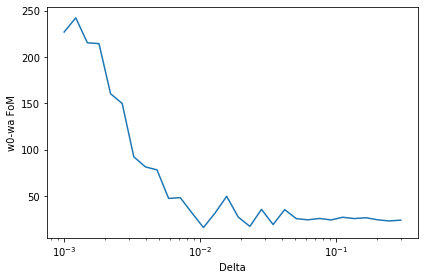

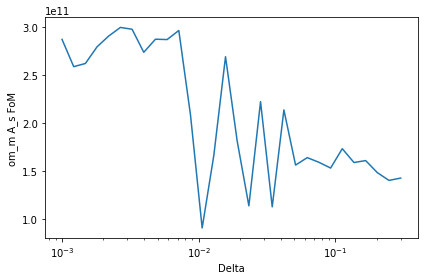

In [37]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $w_a$

In [38]:
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "%d"%para_ind, "0.1"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 167875401319.6491
w0 wa 26.69176601806329


Pick 0.1 for $\Omega_m$

In [13]:
# F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
p = subprocess.call(["/home/nbhandar/Fisher/deriv_tuner_wrapper.sh", "1", "0.1"]) #, stdin=PIPE, stdout=PIPE, stderr=PIPE)
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 417489787069.9648
w0 wa 24.464161669232027


The higher order stencil doesn't seem to help much. Let's try a Cosmosis with higher accuracy settings

## High Accuracy

In [7]:
delta_start = 1e-3
delta_end = 3e-1
delta_num = 30
deltas = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

#### Parameter $\Omega_m$

3 point stencil

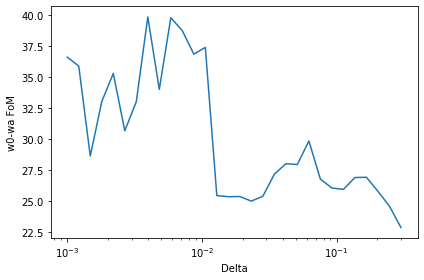

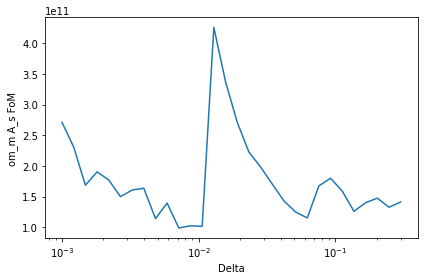

In [11]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_m_3pt.dat")
# foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_ommh2_old.dat")
# foms = np.vstack((foms0, foms))
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

5 point stencil

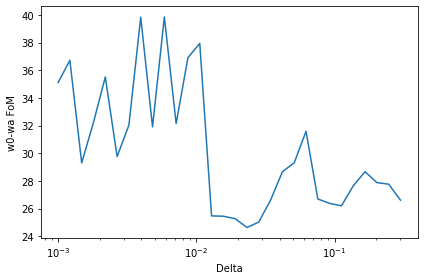

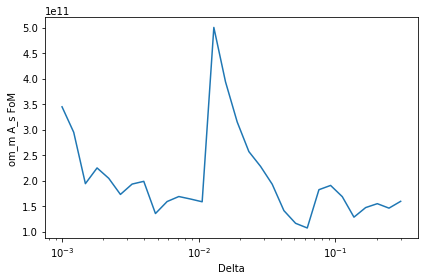

In [10]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_m.dat")
# foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_ommh2_old.dat")
# foms = np.vstack((foms0, foms))
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $\Omega_m$

#### Parameter $w_0$

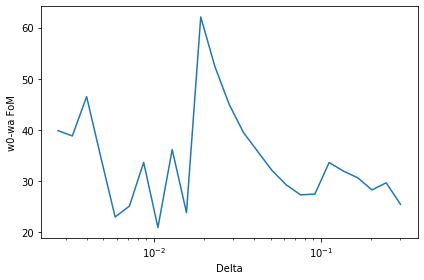

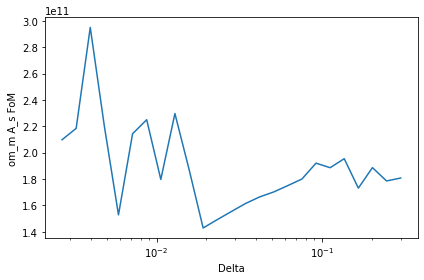

In [9]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_w0.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[5:], fom_w0_wa[5:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[5:], fom_om_m_h2_A_s[5:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.09 for $w_0$

#### Parameter $h_0$

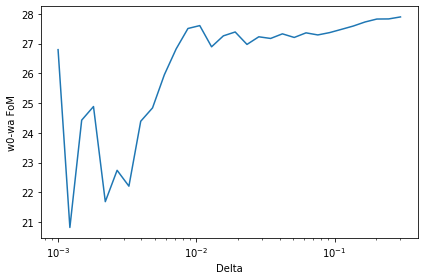

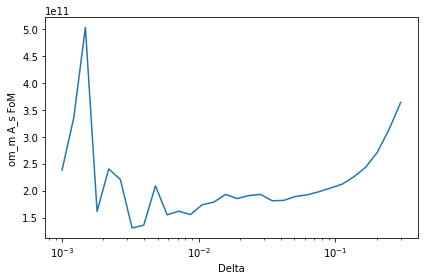

In [8]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_h0.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.03 for $h_0$

#### Parameter $A_s$

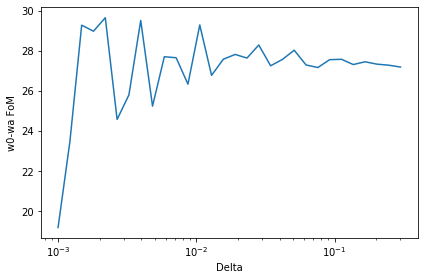

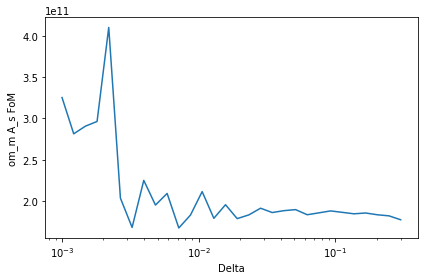

In [7]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_A_s.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $A_s$

#### Parameter $\Omega_b$

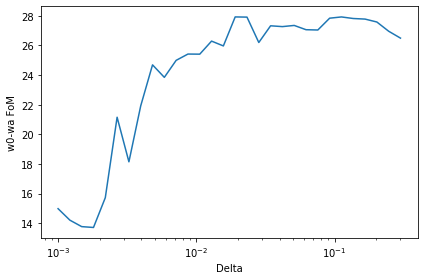

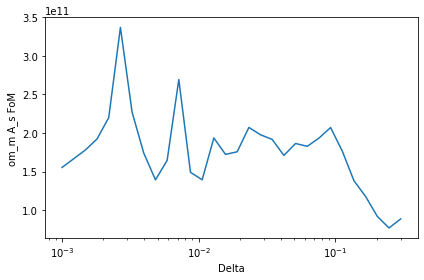

In [24]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_b.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.05 for $\Omega_b$

#### Parameter $n_s$

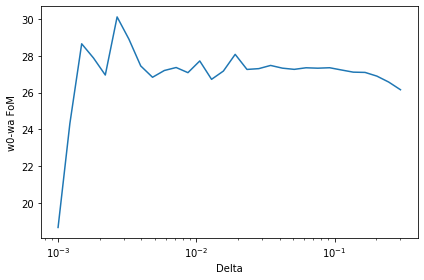

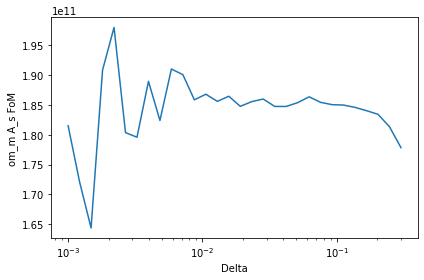

In [27]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_n_s.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $n_s$

#### Parameter $w_a$

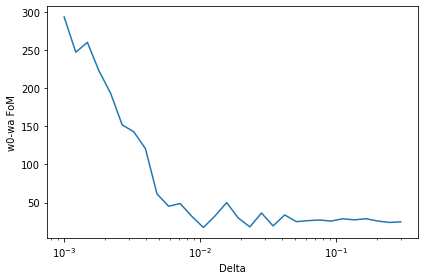

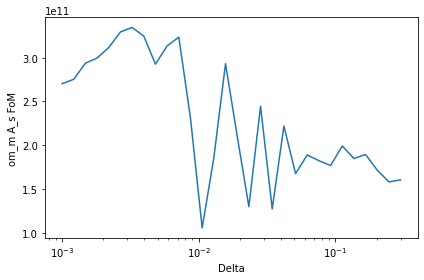

In [37]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_wa.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[15:], fom_w0_wa[15:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[15:], fom_om_m_h2_A_s[15:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

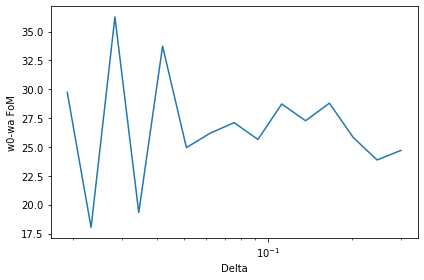

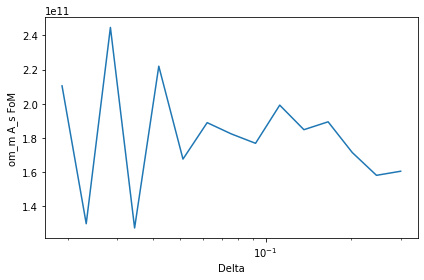

In [38]:
plt.semilogx(deltas[15:], fom_w0_wa[15:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[15:], fom_om_m_h2_A_s[15:])
plt.xlabel("Delta")
plt.ylabel("om_m A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.09 for $w_a$

## After tuning 

In [42]:
F.fisher = np.loadtxt("out_fisher_cluster/fisher_out.dat")
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m,w0,h0,A_s,om_b,n_s,wa
om_m,1.468387e+07,-1.476455e+06,5.434414e+06,8.088715e+14,-8.265051e+06,1.383021e+06,-4.764462e+05
w0,-1.476455e+06,1.502051e+05,-5.476749e+05,-8.181208e+13,8.364475e+05,-1.353545e+05,4.857310e+04
h0,5.434414e+06,-5.476749e+05,2.017721e+06,3.002876e+14,-3.084699e+06,5.126658e+05,-1.772279e+05
A_s,8.088715e+14,-8.181208e+13,3.002876e+14,4.479630e+22,-4.587668e+14,7.532911e+13,-2.648674e+13
om_b,-8.265051e+06,8.364475e+05,-3.084699e+06,-4.587668e+14,4.763257e+06,-7.809655e+05,2.718517e+05
n_s,1.383021e+06,-1.353545e+05,5.126658e+05,7.532911e+13,-7.809655e+05,1.423484e+05,-4.363288e+04
wa,-4.764462e+05,4.857310e+04,-1.772279e+05,-2.648674e+13,2.718517e+05,-4.363288e+04,1.575319e+04


In [44]:
para_pairs_list = [("om_m", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m A_s 187917510729.85773
w0 wa 26.779029340309574


In [45]:
np.linalg.cond(F.fisher)

1.6812186276063705e+22

{('om_m', 'A_s'): 187917510729.85773, ('w0', 'wa'): 26.779029340309574}

# Quad Panel Plots 

#### Parameter $\Omega_m$

Load in 3pt stencil

In [2]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_m_order_2.dat")
deltas_2 = data[:, 0]
om_m_2_fom_om_m_A_s = data[:, 1]
om_m_2_fom_w0_wa = data [:, 2]

Load in 5pt stencil

In [3]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_m_order_4.dat")
deltas_4 = data[:, 0]
om_m_4_fom_om_m_A_s = data[:, 1]
om_m_4_fom_w0_wa = data [:, 2]

Load in 7pt stencil

In [15]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_m_order_6.dat")
deltas_6 = data[:, 0]
om_m_6_fom_om_m_A_s = data[:, 1]
om_m_6_fom_w0_wa = data [:, 2]

Load in 9pt stencil

In [38]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_om_m_order_8.dat")
deltas_8 = data[:, 0]
om_m_8_fom_om_m_A_s = data[:, 1]
om_m_8_fom_w0_wa = data [:, 2]

Plot all the tunings

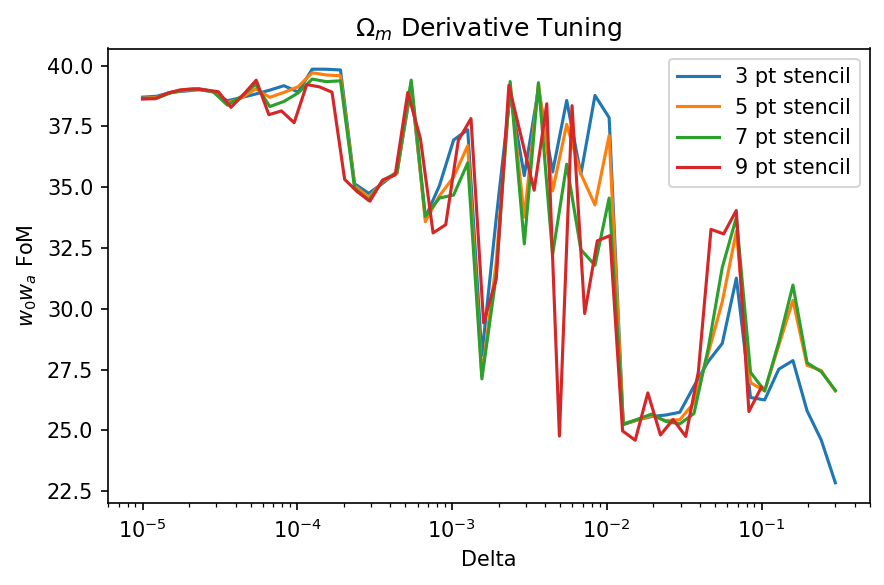

In [39]:
plt.subplots(dpi=150)
plt.semilogx(deltas_2, om_m_2_fom_w0_wa, label="3 pt stencil")
plt.semilogx(deltas_4, om_m_4_fom_w0_wa, label="5 pt stencil")
plt.semilogx(deltas_6, om_m_6_fom_w0_wa, label="7 pt stencil")
plt.semilogx(deltas_8, om_m_8_fom_w0_wa, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$w_0w_a$ FoM')
plt.legend()
plt.title(r'$\Omega_m$ Derivative Tuning')
plt.tight_layout()
plt.show()

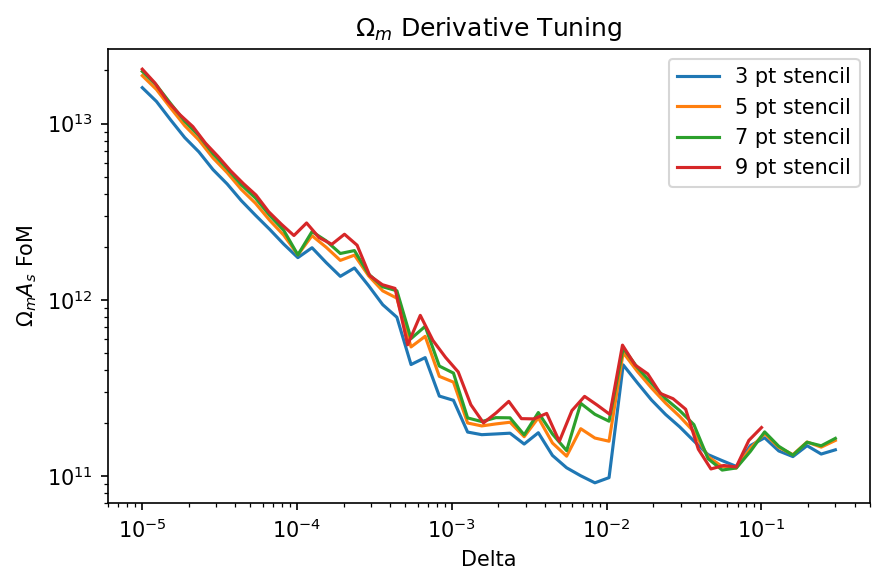

In [40]:
plt.subplots(dpi=150)
plt.loglog(deltas_2, om_m_2_fom_om_m_A_s, label="3 pt stencil")
plt.loglog(deltas_4, om_m_4_fom_om_m_A_s, label="5 pt stencil")
plt.loglog(deltas_6, om_m_6_fom_om_m_A_s, label="7 pt stencil")
plt.semilogx(deltas_8, om_m_8_fom_om_m_A_s, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$\Omega_m A_s$ FoM')
plt.legend()
plt.title(r'$\Omega_m$ Derivative Tuning')
plt.tight_layout()
plt.show()

#### Parameter $w_0$

Load in 3pt stencil

In [4]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_w0_order_2.dat")
deltas_2 = data[:, 0]
w0_2_fom_om_m_A_s = data[:, 1]
w0_2_fom_w0_wa = data [:, 2]

Load in 5pt stencil

In [5]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_w0_order_4.dat")
deltas_4 = data[:, 0]
w0_4_fom_om_m_A_s = data[:, 1]
w0_4_fom_w0_wa = data [:, 2]

Load in 7pt stencil

In [6]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_w0_order_6.dat")
deltas_6 = data[:, 0]
w0_6_fom_om_m_A_s = data[:, 1]
w0_6_fom_w0_wa = data [:, 2]

Load in 9pt stencil

In [7]:
data = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_w0_order_8.dat")
deltas_8 = data[:, 0]
w0_8_fom_om_m_A_s = data[:, 1]
w0_8_fom_w0_wa = data [:, 2]

Plot all the tunings

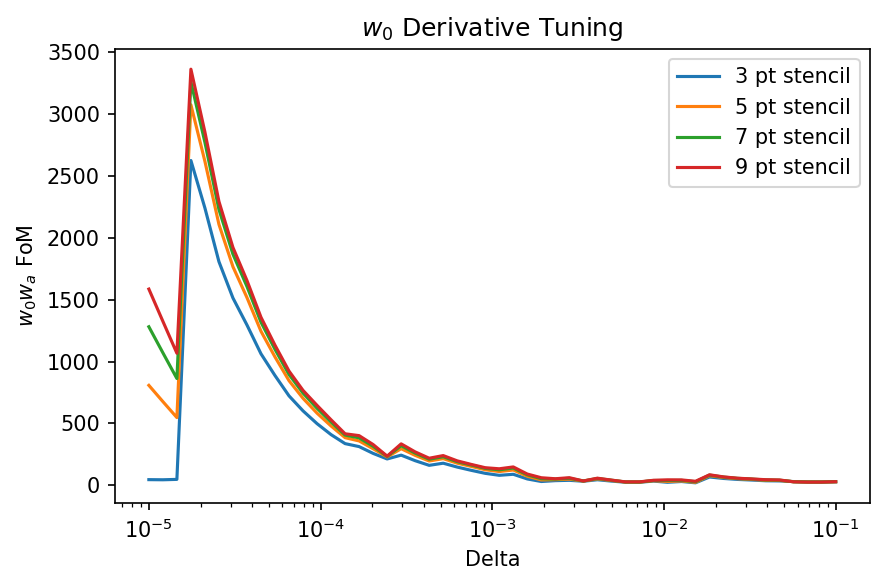

In [8]:
plt.subplots(dpi=150)
plt.semilogx(deltas_2, w0_2_fom_w0_wa, label="3 pt stencil")
plt.semilogx(deltas_4, w0_4_fom_w0_wa, label="5 pt stencil")
plt.semilogx(deltas_6, w0_6_fom_w0_wa, label="7 pt stencil")
plt.semilogx(deltas_8, w0_8_fom_w0_wa, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$w_0w_a$ FoM')
plt.legend()
plt.title(r'$w_0$ Derivative Tuning')
plt.tight_layout()
plt.show()

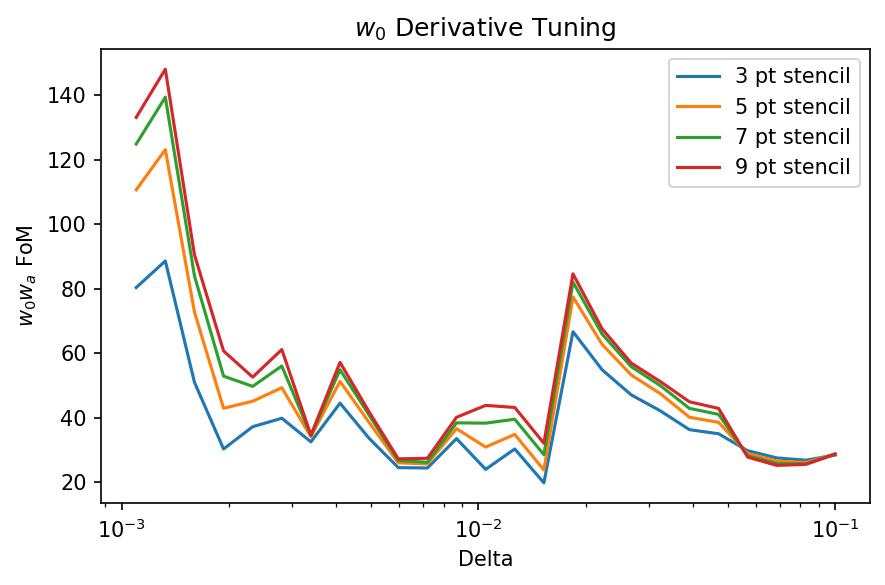

In [23]:
start=25
plt.subplots(dpi=150)
plt.semilogx(deltas_2[start:], w0_2_fom_w0_wa[start:], label="3 pt stencil")
plt.semilogx(deltas_4[start:], w0_4_fom_w0_wa[start:], label="5 pt stencil")
plt.semilogx(deltas_6[start:], w0_6_fom_w0_wa[start:], label="7 pt stencil")
plt.semilogx(deltas_8[start:], w0_8_fom_w0_wa[start:], label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$w_0w_a$ FoM')
plt.legend()
plt.title(r'$w_0$ Derivative Tuning')
plt.tight_layout()
plt.show()

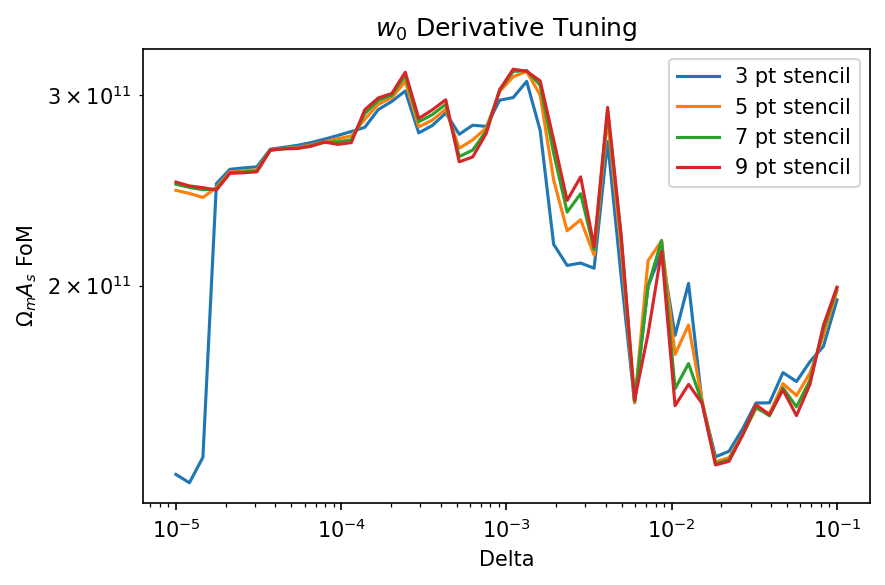

In [9]:
plt.subplots(dpi=150)
plt.loglog(deltas_2, w0_2_fom_om_m_A_s, label="3 pt stencil")
plt.loglog(deltas_4, w0_4_fom_om_m_A_s, label="5 pt stencil")
plt.loglog(deltas_6, w0_6_fom_om_m_A_s, label="7 pt stencil")
plt.semilogx(deltas_8, w0_8_fom_om_m_A_s, label="9 pt stencil")
plt.xlabel("Delta")
plt.ylabel(r'$\Omega_m A_s$ FoM')
plt.legend()
plt.title(r'$w_0$ Derivative Tuning')
plt.tight_layout()
plt.show()